<a href="https://colab.research.google.com/github/HimajaAmbati/skincancer/blob/main/Skincancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pathlib
test_dir=pathlib.Path("/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [17]:
train_dir=pathlib.Path("/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [18]:
imtrain=len(list(train_dir.glob('*/*.jpg')))
print(imtrain)
imtest=len(list(test_dir.glob('*/*.jpg')))
print(imtest)

2239
118


Create dataset

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
batch_size=32
img_height=180
img_width=180
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
)

Found 8671 files belonging to 9 classes.
Using 6937 files for training.


In [21]:
valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
)

Found 8671 files belonging to 9 classes.
Using 1734 files for validation.


In [22]:
print(train_ds.class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Data Visualizing

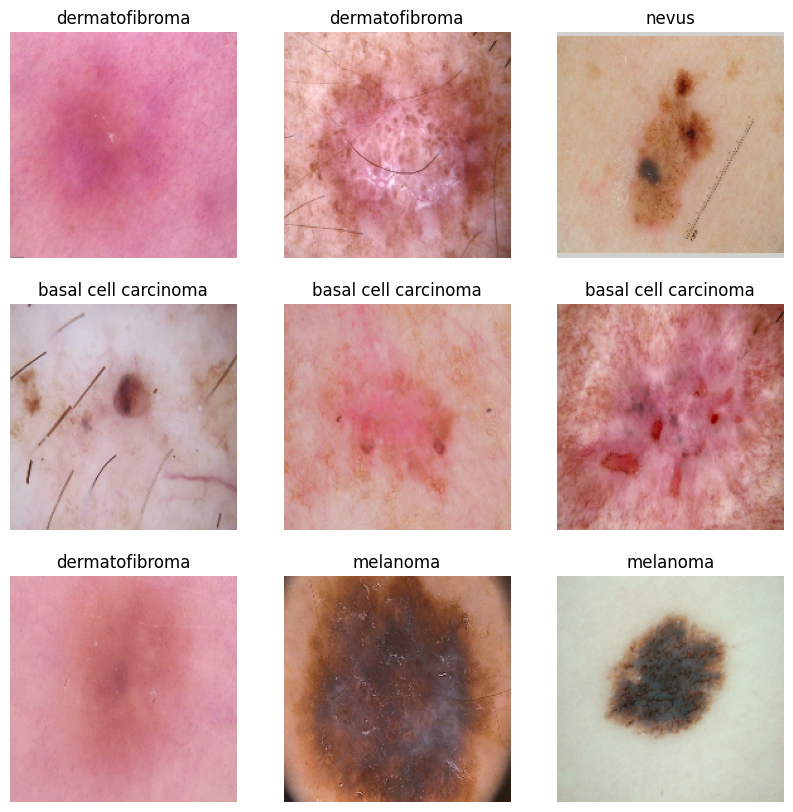

In [23]:
class_names=train_ds.class_names
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
valid_ds=valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

CNN MODEL

In [25]:
num=9
model=Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num)
])

Compling model

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

Model Training

In [28]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs
)

Epoch 1/10
217/217 [==============================] - 347s 1s/step - loss: 1.6741 - accuracy: 0.3738 - val_loss: 1.3294 - val_accuracy: 0.5035
Epoch 2/10
217/217 [==============================] - 227s 1s/step - loss: 1.2368 - accuracy: 0.5463 - val_loss: 1.1124 - val_accuracy: 0.5923
Epoch 3/10
217/217 [==============================] - 231s 1s/step - loss: 0.9697 - accuracy: 0.6530 - val_loss: 0.9141 - val_accuracy: 0.6742
Epoch 4/10
217/217 [==============================] - 231s 1s/step - loss: 0.7547 - accuracy: 0.7274 - val_loss: 0.7319 - val_accuracy: 0.7532
Epoch 5/10
217/217 [==============================] - 225s 1s/step - loss: 0.5615 - accuracy: 0.8021 - val_loss: 0.8082 - val_accuracy: 0.7301
Epoch 6/10
217/217 [==============================] - 228s 1s/step - loss: 0.4594 - accuracy: 0.8345 - val_loss: 0.7116 - val_accuracy: 0.7722
Epoch 7/10
217/217 [==============================] - 227s 1s/step - loss: 0.3306 - accuracy: 0.8848 - val_loss: 0.5345 - val_accuracy: 0.8368

We got accuracy of 90% and validation accuracy of 83%

Training results plot


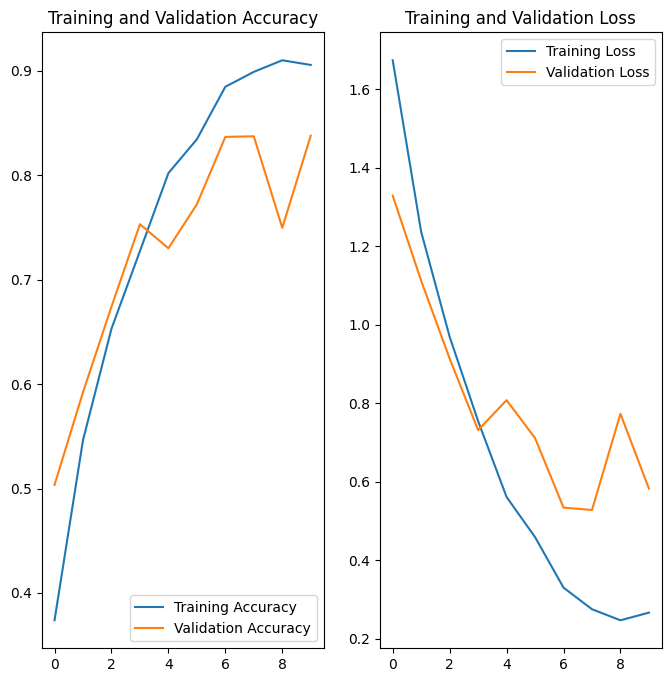

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



*   As training accuracy increases linearly but validation accuracy remained around 55 to 57%
*  It indicates overfitting i.e training data is insufficient.So we r gng to do data augmentation.That is creating more data.





In [30]:
aug_data= keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

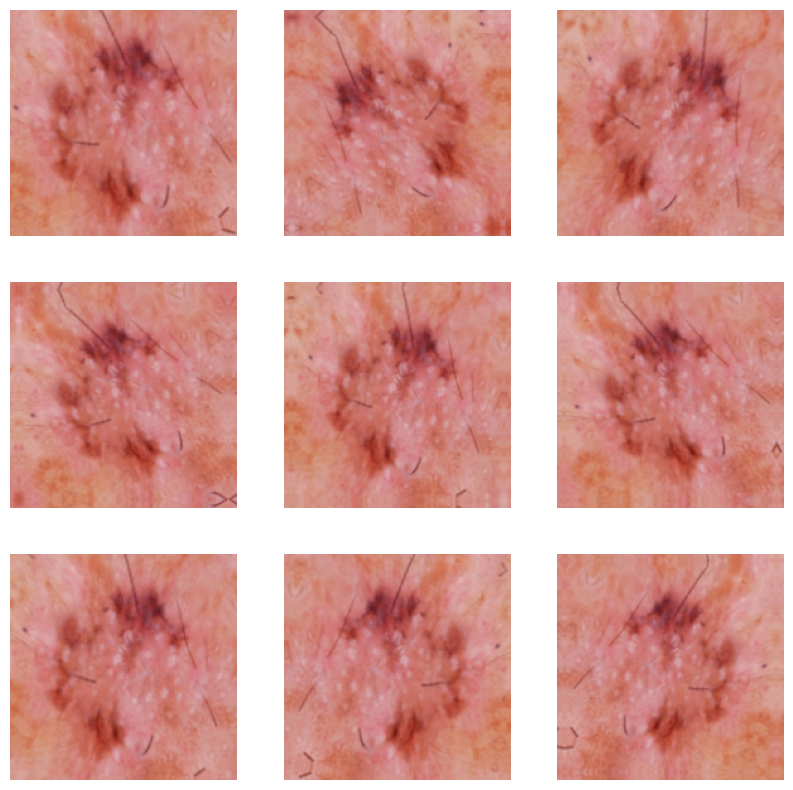

In [31]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = aug_data(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Again creating,compiling and training model.

In [32]:
num=9
model=Sequential([
    aug_data,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
epochs=10
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=epochs
)

Epoch 1/10
217/217 [==============================] - 291s 1s/step - loss: 0.8431 - accuracy: 0.6878 - val_loss: 0.8259 - val_accuracy: 0.6892
Epoch 2/10
217/217 [==============================] - 271s 1s/step - loss: 0.8006 - accuracy: 0.7028 - val_loss: 0.7992 - val_accuracy: 0.7018
Epoch 3/10
217/217 [==============================] - 263s 1s/step - loss: 0.7488 - accuracy: 0.7265 - val_loss: 0.8085 - val_accuracy: 0.7145
Epoch 4/10
217/217 [==============================] - 261s 1s/step - loss: 0.7289 - accuracy: 0.7349 - val_loss: 0.6765 - val_accuracy: 0.7474
Epoch 5/10
217/217 [==============================] - 267s 1s/step - loss: 0.6789 - accuracy: 0.7450 - val_loss: 0.6590 - val_accuracy: 0.7607
Epoch 6/10
217/217 [==============================] - 270s 1s/step - loss: 0.6324 - accuracy: 0.7669 - val_loss: 0.6393 - val_accuracy: 0.7687
Epoch 7/10
217/217 [==============================] - 270s 1s/step - loss: 0.6364 - accuracy: 0.7652 - val_loss: 0.6095 - val_accuracy: 0.7739

We got accuracy and validation accuracy of nearly 80%


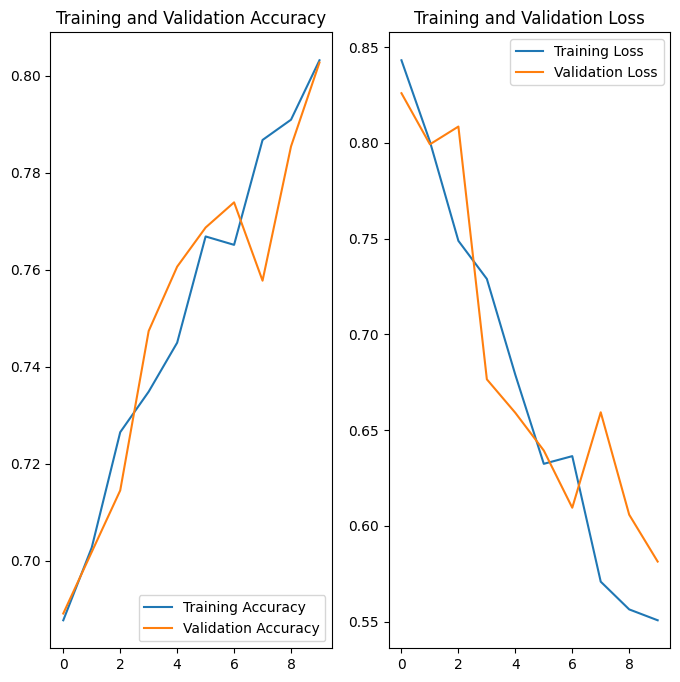

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Herr the graphs are nearly similar

Still not perfect so we r trying underfitting


In [37]:
from glob import glob
path_list = [ x for x in glob(os.path.join(train_dir, '*', '*.jpg')) ]
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(train_dir, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [38]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])

[('/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027334.jpg', 'actinic keratosis'), ('/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026468.jpg', 'actinic keratosis')]


In [39]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()

,Path,Label
0,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
1,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
2,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
3,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
4,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis


In [40]:
original_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

In [41]:
original_df[['Label']].value_counts(normalize=True)

Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
Name: proportion, dtype: float64

dermatofibroma and seborrheic keratosis  have least number of samples

Melanoma and pigmented benign keratosis has large data samples

Using pythons Augmentor

In [42]:
!pip install Augmentor

In [43]:
path_to_training_dataset=str(train_dir) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D5C5013AD70>: 100%|██████████| 500/500 [00:31<00:00, 15.88 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D5C5017E7D0>: 100%|██████████| 500/500 [00:28<00:00, 17.32 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D5C501A38B0>: 100%|██████████| 500/500 [00:22<00:00, 21.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D5C60E15420>: 100%|██████████| 500/500 [01:45<00:00,  4.75 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7D5C60E16C50>: 100%|██████████| 500/500 [01:33<00:00,  5.34 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D5C501A1150>: 100%|██████████| 500/500 [00:25<00:00, 19.26 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D5C507A3790>: 100%|██████████| 500/500 [00:50<00:00,  9.87 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D5C61F1A170>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D5C60504F70>: 100%|██████████| 500/500 [00:23<00:00, 21.15 Samples/s]


In [44]:
image_count_train = len(list(train_dir.glob('*/output/*.jpg')))
print(image_count_train)

10932


In [45]:
path_list_new = [x for x in glob(os.path.join(train_dir, '*','output', '*.jpg'))]
path_list_new[:2]

['/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031335.jpg_90fbceed-9b2b-4d7a-9e62-f4e6b9b7cacc.jpg',
 '/content/drive/MyDrive/ISIC SKIN CANCER /skin zip/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030133.jpg_1f254880-3596-4048-bfea-3386d93c3e84.jpg']

In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_dir, '*','output', '*.jpg'))]
lesion_list_new[:2]

['actinic keratosis', 'actinic keratosis']

In [47]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [48]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True) # Use pd.concat to combine DataFrames
new_df.shape

(13171, 2)

In [49]:
new_df.head()

,Path,Label
0,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
1,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
2,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
3,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis
4,/content/drive/MyDrive/ISIC SKIN CANCER /skin ...,actinic keratosis


In [50]:
# Checking the class distribution after adding 500 samples per label
new_df['Label'].value_counts(normalize=True)

Label
basal cell carcinoma          0.142434
melanoma                      0.141979
actinic keratosis             0.122542
dermatofibroma                0.121099
pigmented benign keratosis    0.111001
nevus                         0.103029
squamous cell carcinoma       0.089667
vascular lesion               0.086478
seborrheic keratosis          0.081771
Name: proportion, dtype: float64

In [51]:
new_df['Label'].value_counts()

Label
basal cell carcinoma          1876
melanoma                      1870
actinic keratosis             1614
dermatofibroma                1595
pigmented benign keratosis    1462
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
seborrheic keratosis          1077
Name: count, dtype: int64

Training model using Augmented data

In [52]:
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13171 files belonging to 9 classes.
Using 10537 files for training.


Validation dataset

In [53]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13171 files belonging to 9 classes.
Using 2634 files for validation.


CNN MODEL

In [54]:
model = Sequential([
  aug_data,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num)
])

In [55]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
330/330 [==============================] - 530s 2s/step - loss: 1.6734 - accuracy: 0.3529 - val_loss: 1.6453 - val_accuracy: 0.3975
Epoch 2/10
330/330 [==============================] - 487s 1s/step - loss: 1.3660 - accuracy: 0.4774 - val_loss: 1.3992 - val_accuracy: 0.4753
Epoch 3/10
330/330 [==============================] - 491s 1s/step - loss: 1.2537 - accuracy: 0.5295 - val_loss: 1.1950 - val_accuracy: 0.5437
Epoch 4/10
330/330 [==============================] - 483s 1s/step - loss: 1.1606 - accuracy: 0.5690 - val_loss: 1.1536 - val_accuracy: 0.5744
Epoch 5/10
330/330 [==============================] - 489s 1s/step - loss: 1.1037 - accuracy: 0.5881 - val_loss: 1.0175 - val_accuracy: 0.6283
Epoch 6/10
330/330 [==============================] - 488s 1s/step - loss: 1.0074 - accuracy: 0.6225 - val_loss: 1.0689 - val_accuracy: 0.6025
Epoch 7/10
330/330 [==============================] - 489s 1s/step - loss: 0.9587 - accuracy: 0.6442 - val_loss: 0.8691 - val_accuracy: 0.6811

Accuracy is 70% nd validation accuracy is 72%

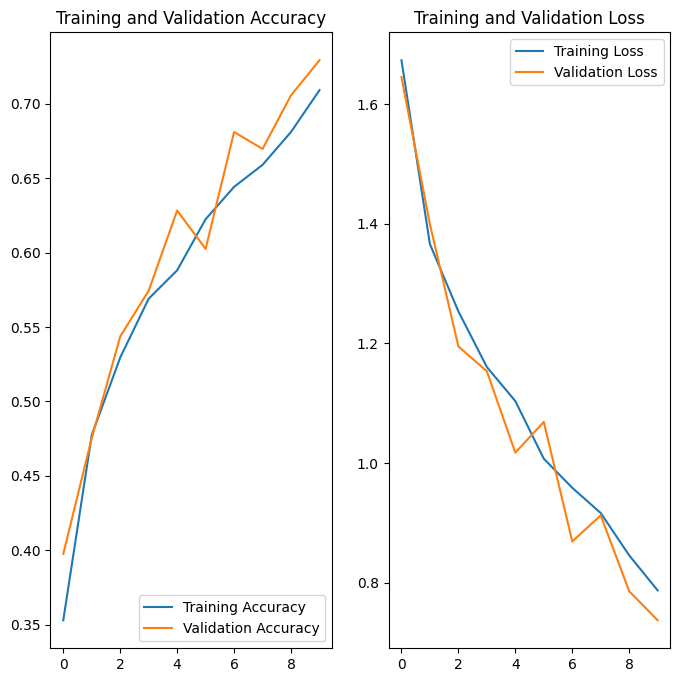

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()